# Implement inverse polynomial reconstruction

### Method 1 with Chebyshev polynomials

/home/calab912/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


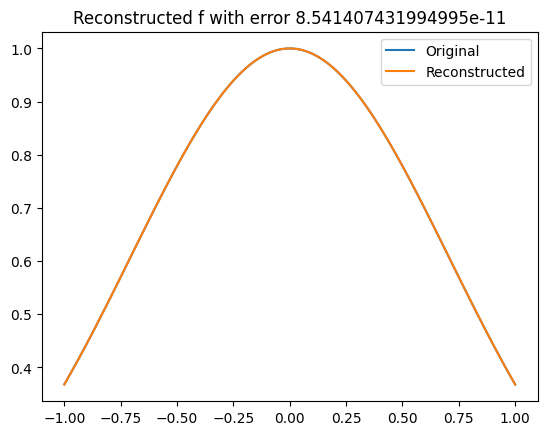

In [2]:
import spectral_derivative as sd 
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 


def getk(x): 
    N = int(len(x)/2)
    dx = x[1] - x[0]
    a  = x[0]
    b  = x[-1] + dx 
    return np.pi * np.concatenate([np.arange(0, N + 1),-np.flip(np.arange(1, N))]) / ((b - a)/2)


#Construct matrices T and V recursively for arbitrary lambda
def directW(x, N, lam): 
    # Even 
    W = np.zeros((2*N, 2*N), dtype=complex)
    
    for l in range(2*N):
        W[:, l] = scipy.fft.fft(C(x, lam, l))

    return W 

def C(x, lam, N, derivative_order = 0): 
    return scipy.special.chebyu(N).deriv(derivative_order)(x)
def reconstruct(g, lam, x, derivative_order = 0): 
    n = len(x)
    f = np.zeros(x.shape, dtype=complex)
    for l, coeff in enumerate(g):
        f += coeff * C(x, lam, l, derivative_order)

    return f

N = 10
x = np.linspace(-1, 1, 2*N+1)[:-1]
alpha = 1
def func(x):
    return np.exp(-(x)**2/alpha)

def ddfunc(x):
    #return 2 * x * np.exp(x**2)
    #return (2 + 4 * x**2) * np.exp(x**2)
    return (-2/alpha + 4 * (x)**2/alpha**2) * np.exp(-(x)**2/alpha)

f = func(x) 
lam = 0.5

fhat = scipy.fft.fft(f) 
inv = scipy.linalg.inv(directW(x, N, lam))

g = np.matmul(inv, fhat) 
x = np.linspace(-1, 1, 100)
frec = reconstruct(g, lam, x) 

plt.title(f"Reconstructed f with error {np.mean(np.abs(func(x) - frec))}") 
plt.plot(x, func(x), label="Original")
plt.plot(x, frec, label="Reconstructed")
plt.legend()
plt.show() 

### Method I Derivative in k-space

[  0.           3.14159265   6.28318531   9.42477796  12.56637061
  15.70796327  18.84955592  21.99114858  25.13274123  28.27433388
  31.41592654 -28.27433388 -25.13274123 -21.99114858 -18.84955592
 -15.70796327 -12.56637061  -9.42477796  -6.28318531  -3.14159265]


/home/calab912/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


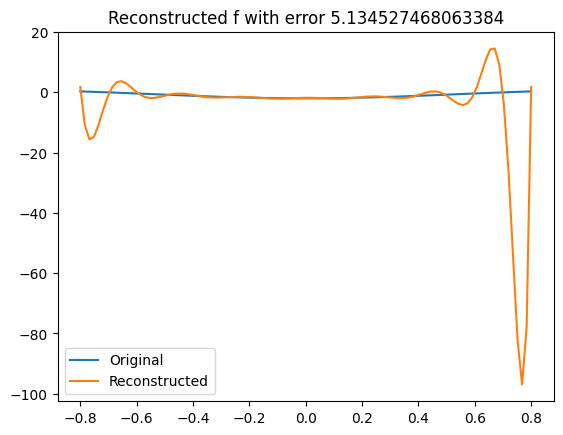

In [46]:

x = np.linspace(-1, 1, 2*N+1)[:-1]

k    = getk(x) 
print(k)
fhat = scipy.fft.fft(f) * (-k**2)
frec = scipy.fft.ifft(fhat)
inv = scipy.linalg.inv(directW(x, N, lam))

g = np.matmul(inv, fhat) 
x = np.linspace(-0.8, 0.8, 100)
frec = reconstruct(g, lam, x) 

plt.title(f"Reconstructed f with error {np.mean(np.abs(ddfunc(x) - frec))}") 
plt.plot(x, ddfunc(x), label="Original")
plt.plot(x, frec, label="Reconstructed")
plt.legend()
plt.show() 

### Method I Derivative in Cheby-space

[  0.           3.14159265   6.28318531   9.42477796  12.56637061
  15.70796327  18.84955592  21.99114858  25.13274123  28.27433388
  31.41592654 -28.27433388 -25.13274123 -21.99114858 -18.84955592
 -15.70796327 -12.56637061  -9.42477796  -6.28318531  -3.14159265]


/home/calab912/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


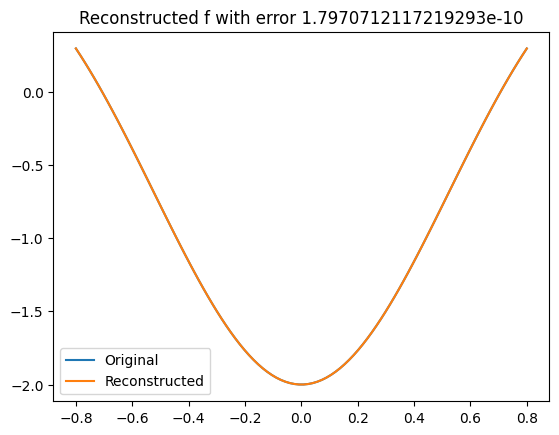

In [55]:

x = np.linspace(-1, 1, 2*N+1)[:-1]

k    = getk(x) 
print(k)
fhat = scipy.fft.fft(f)
inv = scipy.linalg.inv(directW(x, N, lam))
g = np.matmul(inv, fhat) 
x = np.linspace(-0.8, 0.8, 100)
frec = reconstruct(g, lam, x, derivative_order=2) 

plt.title(f"Reconstructed f with error {np.mean(np.abs(ddfunc(x) - frec))}") 
plt.plot(x, ddfunc(x), label="Original")
plt.plot(x, frec, label="Reconstructed")
plt.legend()
plt.show() 

### Method I w.r.t. different basis

/home/calab912/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


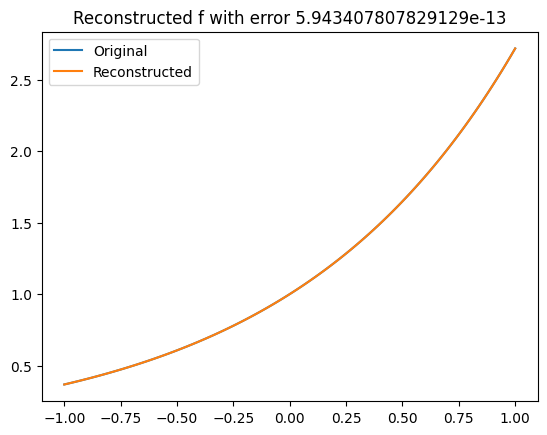

In [5]:
import spectral_derivative as sd 
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 


def C(x, lam, N): 
    return scipy.special.eval_chebyt(N, x)

xiexie = np.random.rand(18) 

#Construct matrices T and V recursively for arbitrary lambda
def directW(x, N, lam): 
    # Even 
    W = np.zeros((2*N, 2*N), dtype=complex)
    
    for l in range(2*N):
        W[:, l] = scipy.fft.fft(C(x, lam, l)) * xiexie

    return W 

def reconstruct(g, lam, x): 
    n = len(x)
    f = np.zeros(x.shape, dtype=complex)
    for l, coeff in enumerate(g):
        f += coeff * C(x, lam, l)

    return f

N = 9
x = np.linspace(-1, 1, 2*N+1)[:-1]

def func(x):
    return np.exp(x)

f = func(x) 
lam = 0.5

fhat = scipy.fft.fft(f)  * xiexie
inv = scipy.linalg.inv(directW(x, N, lam))

g = np.matmul(inv, fhat) 
x = np.linspace(-1, 1, 100)
frec = reconstruct(g, lam, x) 

plt.title(f"Reconstructed f with error {np.mean(np.abs(func(x) - frec))}") 
plt.plot(x, func(x), label="Original")
plt.plot(x, frec, label="Reconstructed")
plt.legend()
plt.show() 

### Method I with truncation for stability

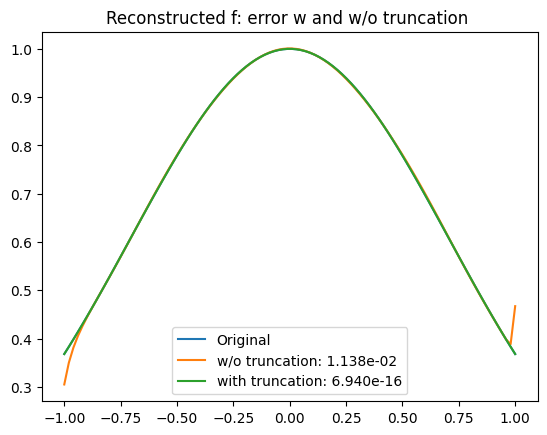

In [18]:
import spectral_derivative as sd 
import numpy as np 
import scipy 
import matplotlib.pyplot as plt 
from scipy.linalg import lu 

def gaussWithTruncation(A,B):
    """
    Solve Ax = B using Gaussian elimination and LU decomposition with truncation for stability of IPR
    """
    # LU decomposition with pivot
    p, l, u = lu(A, permute_l=False)
    
    # forward substitution to solve for Ly = B
    y = np.zeros(B.size, dtype=complex)
    for m, b in enumerate((p.T @ B).flatten()):
        y[m] = b
        # skip for loop if m == 0
        if m:
            for n in range(m):
                y[m] -= y[n] * l[m,n]
        y[m] /= l[m, m]

    # truncation for IPR
    c = np.abs(y) < 100 * np.finfo(float).eps
    y[c] = 0

    # backward substitution to solve for y = Ux
    x = np.zeros(B.size, dtype=complex)
    lastidx = B.size - 1  # last index
    for midx in range(B.size):
        m = B.size - 1 - midx  # backwards index
        x[m] = y[m]
        if midx:
            for nidx in range(midx):
                n = B.size - 1  - nidx
                x[m] -= x[n] * u[m,n]
        x[m] /= u[m, m]
    return x

N = 28
x = np.linspace(-1, 1, 2*N+1)[:-1]
alpha = 1
def func(x):
    return np.exp(-(x)**2/alpha)

def ddfunc(x):
    #return 2 * x * np.exp(x**2)
    #return (2 + 4 * x**2) * np.exp(x**2)
    return (-2/alpha + 4 * (x)**2/alpha**2) * np.exp(-(x)**2/alpha)

f = func(x) 
lam = 50

fhat = scipy.fft.fft(f) 
W   = directW(x, N, lam)
inv = scipy.linalg.inv(W)

g = np.matmul(inv, fhat) 
x = np.linspace(-1, 1, 100)
frec = reconstruct(g, lam, x) 

g = gaussWithTruncation(W, fhat) 
ftrunc = reconstruct(g, lam, x) 

plt.title(f"Reconstructed f: error w and w/o truncation ") 
plt.plot(x, func(x), label="Original")
plt.plot(x, frec  , label=f"w/o truncation: {np.mean(np.abs(func(x) - frec)):3.3e}")
plt.plot(x, ftrunc, label=f"with truncation: {np.mean(np.abs(func(x) - ftrunc)):3.3e}")
plt.legend()
plt.show() 

### Analytical expressions form first paper 
- too complicated
- I could not get it too work
- probably typos-
- how to deal with negative momenta

In [154]:



def fft(f):
    n = len(f)
    N = int(n/2)
    fhat = np.zeros( n, dtype=complex)
    for k in range( n ):
        ck    = 1 + (k == N)
        #x-array in [-1, 1]
        x     = (-1 + np.arange(n) / N )
        waves = np.exp(- 1j * np.pi * k * x )
        #normalisation
        C     = 1/(2 * N * ck) 
        fhat[k] = C * np.sum( f *  waves )

    return fhat


#Construct matrices T and V analytically for Legendre polynomials with lambda = 0.5
def analyticalW(N): 
    
    # Even 
    T = np.zeros((2*N, 2*N), dtype=complex)
    V = np.zeros((2*N, 2*N), dtype=complex)

    for k in range(2*N): 
        for l in range(2*N): 
            if k != 0: 
                if l % 2 != 0:
                    T[k, l] = (-1)**((l-1)/2) * np.sqrt(1/(2*np.abs(k))) * scipy.special.jv(l + 0.5, np.pi * np.abs(k)) * 2
                else:
                    V[k, l] = (-1)**((l-0)/2) * np.sqrt(1/(2*np.abs(k))) * scipy.special.jv(l + 0.5, np.pi * np.abs(k)) * 2
            if k == 0 and l == 0:
                V[k, l] = 1
    return T, V

def C(x, lam, N): 
    return scipy.special.eval_gegenbauer(N, lam, x)
#Construct matrices T and V recursively for arbitrary lambda
def directW(x, N, lam): 
    # Even 
    W = np.zeros((2*N, 2*N), dtype=complex)
    ks = np.arange(N + 1)
    
    for k in range(2*N): 
        for l in range(2*N):
            W[k, l] = fft(C(x, lam, l))

#Construct matrices T and V recursively for arbitrary lambda
def recursiveW(N, lam): 
    # Even 
    T = np.zeros((2*N, 2*N), dtype=np.complex128)
    V = np.zeros((2*N, 2*N), dtype=np.complex128)

    ks = np.arange(N + 1)
    
    for i, k in enumerate(ks): 
        for l in range(2*N): 
    
            #We know V00, Vk0 and V0l 
            if k == 0 and l == 0:
                V[i, l] = 1
            elif k != 0 and l == 0: 
                V[i, l] = 0
            elif k == 0 and l != 0:
                V[i, l] = 1/(l + lam) * (C(1, lam, l+1) - C(1, lam, l-1))
                 
            #We know T0l and Tk1
            if k == 0: 
                T[i, l] = 0
            elif k != 0 and l == 1: 
                T[i, l] = (-1) ** ( k + 1 ) * 4 * lam / ( k * np.pi )

            #T zero for even l 
            if k != 0 and l != 0 and l % 2 == 0: 
                T[i, l] = 0

            #V zero for odd l 
            if k != 0 and l != 0 and l % 2 != 0: 
                V[i, l] = 0


            #Compute Vkl for even l from Vk,l-2 and Tk,l-1
            if k != 0 and l != 0 and l % 2 == 0: 
                V[i, l] = V[i, l-2] \
                    - 2 * ( l - 1 + lam ) / (k * np.pi) * T[i, l-1]
                 
            #Compute Tkl+1 for even l from Vk,l and Tk,l-1
            if k != 0 and l != 0 and l % 2 == 0: 
                T[i, l+1] = T[i, l-1] \
                    + (-1) ** ( k + 1 ) * 2 / ( k * np.pi ) * ( C(1, lam, l+1) - C(1, lam, l-1) )\
                          + 2 * ( l + lam ) / ( k * np.pi ) * V[i, l]
    
    return T, V

def recursiveMethod2(N, lam): 
    # Even 
    T = np.zeros((N    , N    ), dtype=np.complex128)
    V = np.zeros((N + 1, N + 1), dtype=np.complex128)

    ks = np.arange(2*N)#np.concatenate([np.arange(0, N+1), np.arange(-N+1, 0)]).astype(float)

    print("Ks: ", ks)
    
    for i, k in enumerate(ks): 
        for l in range(2*N): 
    
            #We know V00, Vk0 and V0l 
            if k == 0 and l == 0:
                V[i, l] = 1
            elif k != 0 and l == 0: 
                V[i, l] = 0
            elif k == 0 and l != 0:
                V[i, l] = 1/(l + lam) * (C(1, lam, l+1) - C(1, lam, l-1))
                 
            #We know T0l and Tk1
            if k == 0: 
                T[i, l] = 0
            elif k != 0 and l == 1: 
                T[i, l] = (-1) ** ( k + 1 ) * 4 * lam / ( k * np.pi )

            #T zero for even l 
            if k != 0 and l != 0 and l % 2 == 0: 
                T[i, l] = 0

            #V zero for odd l 
            if k != 0 and l != 0 and l % 2 != 0: 
                V[i, l] = 0


            #Compute Vkl for even l from Vk,l-2 and Tk,l-1
            if k != 0 and l != 0 and l % 2 == 0: 
                V[i, l] = V[i, l-2] \
                    - 2 * ( l - 1 + lam ) / (k * np.pi) * T[i, l-1]
                 
            #Compute Tkl+1 for even l from Vk,l and Tk,l-1
            if k != 0 and l != 0 and l % 2 == 0: 
                T[i, l+1] = T[i, l-1] \
                    + (-1) ** ( k + 1 ) * 2 / ( k * np.pi ) * ( C(1, lam, l+1) - C(1, lam, l-1) )\
                          + 2 * ( l + lam ) / ( k * np.pi ) * V[i, l]
    
    return T, V

def reconstruct(g, lam, x): 
    n = len(x)
    f = np.zeros(x.shape, dtype=complex)
    for l, coeff in enumerate(g):
        f += coeff * C(x, lam, l)

    return f

In [155]:
N = 6
lam = 0.5
Ta, Va = analyticalW(N)
Tn, Vn = recursiveW(N, lam) 

W = Tn + 1j * Vn

inv = scipy.linalg.inv(W.T)

LinAlgError: singular matrix

/home/calab912/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


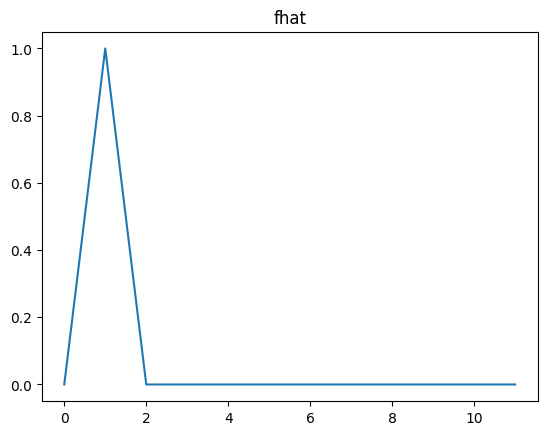

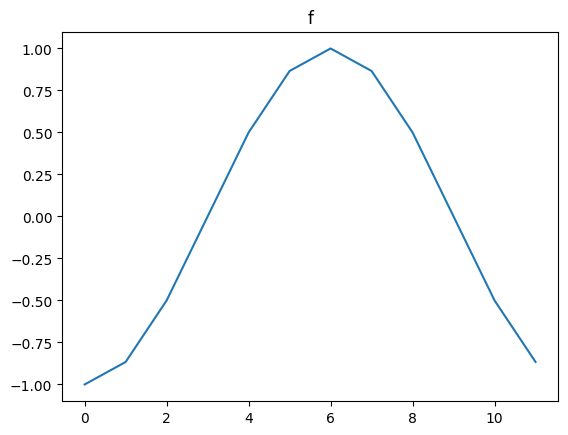

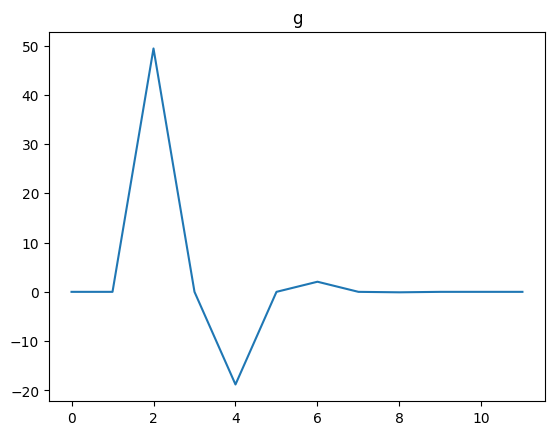

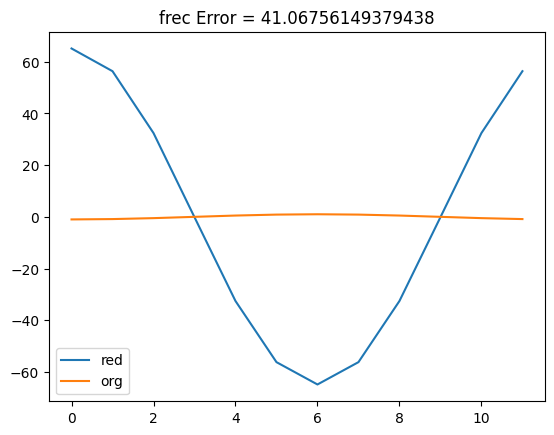

array([-66.13489487-3.47628690e-03j, -57.2151586 -3.41234398e+01j,
       -32.91550151-5.90000388e+01j,   0.1423784 -6.79812734e+01j,
        33.06165628-5.87562477e+01j,  57.07967676-3.38747495e+01j,
        65.85374363+3.34531477e-03j,  57.07633779+3.38805499e+01j,
        33.05586261+5.87596102e+01j,   0.13567099+6.79812917e+01j,
       -32.92132684+5.89966948e+01j, -57.21852966+3.41176212e+01j])

In [153]:
import matplotlib.pyplot as plt 

N = 6
x = np.linspace(-1, 1, 2*N+1)[:-1]
f = np.exp(1j * np.pi * x)
fhat = fft(f) 
lam = 0.5
Ta, Va = analyticalW(N)
Tn, Vn = recursiveW(N, lam) 

W = Va + Ta * 1j


inv = scipy.linalg.inv(W)

g = np.matmul(inv, fhat) 

if 1:
    if 0:
        plt.title("Ta")
        plt.imshow(np.abs(Ta))
        plt.show() 
        plt.title("Va")
        plt.imshow(np.abs(Va))
        plt.show() 
        plt.title("Tn")
        plt.imshow(np.abs(Tn))
        plt.show() 
        plt.title("Va")
        plt.imshow(np.abs(Va))
        plt.show() 
    plt.title("fhat") 
    plt.plot(fhat)
    plt.show()
    plt.title("f") 
    plt.plot(ifft(fhat))
    plt.show()

plt.title("g") 
plt.plot(g) 
plt.show()


frec = reconstruct(g, lam, x)*2

plt.title(f"frec Error = {np.mean(np.abs(frec.real - f.real))}") 
plt.plot(frec.real, label="red")
plt.plot(f   , label="org")
plt.legend()
plt.show()

f - frec

In [147]:
for i in range(2*N):
    for j in range(2*N):
        if np.abs(Ta[i, j] - Tn[i, j]) > 1e-10:
            print(f"Re T[{i},{j}] = {Ta[i, j].real} vs {Tn[i,j].real}")
            print(f"Im T[{i},{j}] = {Ta[i, j].imag} vs {Tn[i,j].imag}")
        if np.abs(Va[i, j] - Vn[i, j]) > 1e-10:
            print(f"Re V[{i},{j}] = {Va[i, j].real} vs {Vn[i,j].real}")
            print(f"Im V[{i},{j}] = {Va[i, j].imag} vs {Vn[i,j].imag}")

In [24]:
2/np.pi, np.sqrt(1/2) * scipy.special.jv(3/2, np.pi) * 2

(0.6366197723675814, 0.636619772367582)

In [ ]:

alpha = beta  = 1/4
x  = (np.linspace(a, b, N  + 1)[:-1] - (a + b)/2)/ ((b - a)/2)
xi = (np.linspace(a, b, Ni + 1)[:-1] - (a + b)/2)/ ((b - a)/2)
f      = func(x) 
B, poly = sd.getShiftFunction(x, f, mode=sd.M_POLYNOMIAL, derivative_mode=sd.ONE_SIDED, N=3, lb = 0, rb = 0)

fhat   = fft(f - B[0])
frec   = ifft(fhat) + B[0]
g, lam = fft2gegenbauer(fhat, alpha, beta) 
fint   = igegenbauer(g, lam, xi) + poly(xi)

plt.title(f"f vs f_int with error = {np.mean(np.abs(func(xi) - fint)):3.3e}") 
plt.plot(x, f, label="f")
plt.scatter(x, frec.real, label="f rec")
plt.plot(xi, fint.real, label="Int")
plt.legend()
plt.show()
plt.title(r"$\log(abs(f - f_{int}))$") 
plt.yscale("log")
plt.plot(xi, np.abs(func(xi) - fint.real))
plt.show()